# Imports and APIs

### APIs to test:
- [URLScan](https://urlscan.io)
    - pip install urlscanio


In [18]:
# %pip install urlscanio
# %pip install python-dotenv
# %pip install requests
# %pip install pandas
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 33.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 10.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import dotenv
import os
import requests
import json

dotenv.load_dotenv('.env')

urlscan_api_key = os.getenv('URLScan_API_Key')



# Collect URL Scan Data

In [10]:
headers_urlscan = {
    'API-Key': urlscan_api_key,
    'Content-Type': 'application/json'
}
url_to_scan = 'https://monkeytype.com/'
data_urlscan = {
    "url": url_to_scan, 
    "visibility": "public"
}
response = requests.post('https://urlscan.io/api/v1/scan/',headers=headers_urlscan, data=json.dumps(data_urlscan))

response.json()

{'code': 'validationerror',
 'message': 'Missing reCaptcha Token',
 'status': 400,
 'errors': [{'code': 'validationerror',
   'title': 'Missing reCaptcha Token',
   'detail': 'Missing reCaptcha Token',
   'status': 400}]}

In [11]:
r = requests.get('https://urlscan.io/api/v1/result/' + 'd5587f5b-aae8-4b53-8190-1cba351d3d10/')
r.json()

{'data': {'requests': [{'request': {'requestId': '1E9D51CE97BE030BFA8F6C190F8D2776',
     'loaderId': '1E9D51CE97BE030BFA8F6C190F8D2776',
     'documentURL': 'https://monkeytype.com/',
     'request': {'url': 'https://monkeytype.com/',
      'method': 'GET',
      'headers': {'Upgrade-Insecure-Requests': '1',
       'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.5993.117 Safari/537.36',
       'accept-language': 'de-DE,de;q=0.9'},
      'mixedContentType': 'none',
      'initialPriority': 'VeryHigh',
      'referrerPolicy': 'strict-origin-when-cross-origin',
      'isSameSite': True},
     'timestamp': 34971507.211877,
     'wallTime': 1698642895.530673,
     'initiator': {'type': 'other'},
     'redirectHasExtraInfo': False,
     'type': 'Document',
     'frameId': 'E7AF8FB7E2EED9B58D716FB67C370229',
     'hasUserGesture': False,
     'primaryRequest': True},
    'response': {'encodedDataLength': 21364,
     'dataLength': 1

True

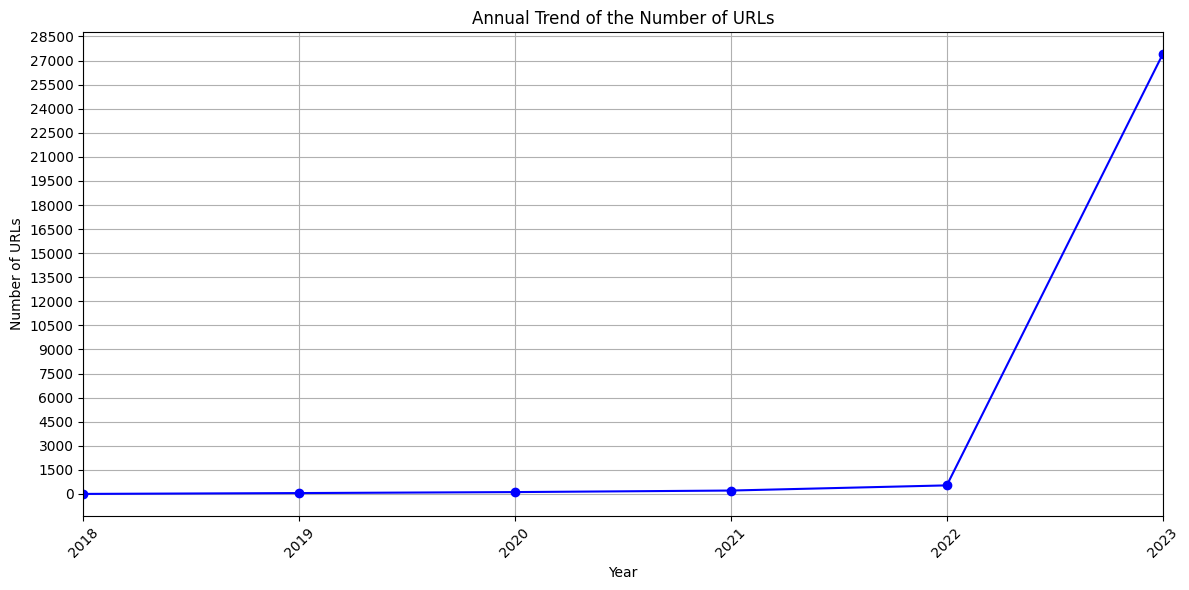

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('urlHausDatadump.csv')
# print(df_active_urls.head())

# Checking if the data is a DataFrame
if isinstance(data, pd.DataFrame):
    # Convert 'dateadded' to datetime format if it's not already
    if not pd.api.types.is_datetime64_any_dtype(data['dateadded']):
        data['dateadded'] = pd.to_datetime(data['dateadded'])

    # Group by Year and count the number of URLs
    monthly_counts = data.groupby(data['dateadded'].dt.to_period('Y')).size()

    # Plotting
    plt.figure(figsize=(12, 6))
    monthly_counts.plot(kind='line', marker='o', color='b')
    plt.title('Annual Trend of the Number of URLs')
    plt.xlabel('Year')
    plt.ylabel('Number of URLs')
    # plt.ylim(0, 12000)
    plt.yticks(range(0, 30000, 1500)) # Set ticks every 500
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plot_success = True
else:
    plot_success = False

plot_success





